In [1]:
import pandas as pd
import numpy as np
from astropy.io import ascii as ap_ascii
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
!ls -l

total 109312
-rw-rw-r-- 1 ubuntu ubuntu     4036 Oct 17 11:41 002990873
-rw-rw-r-- 1 ubuntu ubuntu     4036 Oct 19 22:43 002990873.1
-rw-rw-r-- 1 ubuntu ubuntu      329 Oct 14 22:13 README.md
drwxrwxr-x 2 ubuntu ubuntu     4096 Oct 20 01:11 __pycache__
-rw-rw-r-- 1 ubuntu ubuntu  3650473 Oct 19 23:16 cumulative_2020.10.19_16.12.52.csv
-rw-rw-r-- 1 ubuntu ubuntu      232 Oct 20 01:06 definitions.py
-rw-rw-r-- 1 ubuntu ubuntu   217785 Oct 20 01:12 eda.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 31546781 Oct 19 22:43 full_tce_list.csv
-rw-rw-r-- 1 ubuntu ubuntu 11584055 Oct 20 01:01 full_tce_list_with_disposition_34032.csv
-rw-rw-r-- 1 ubuntu ubuntu      937 Oct 17 14:16 get_light_curves.py
drwxrwxr-x 3 ubuntu ubuntu     4096 Oct 14 20:52 helpers
-rw-r--r-- 1 ubuntu ubuntu 46576123 Oct 13 23:58 kplr_dr25_obs_robovetter_input.txt
-rw-rw-r-- 1 ubuntu ubuntu  3248616 Oct 13 23:36 kplr_dr25_obs_robovetter_output.txt
-rw-rw-r-- 1 ubuntu ubuntu    11626 Oct  8 21:13 main.py
-rw-rw-r-- 1 ubuntu ubuntu     

In [3]:
tce=pd.read_csv('kplr_dr25_obs_robovetter_output.txt',delim_whitespace=True)

In [4]:
tce

,#1:TCE,2:Robovetter_Score,3:Disposition,4:Not_Transit-Like_Flag,5:Stellar_Eclipse_Flag,6:Centroid,Offset_Flag,7:Ephemeris_Match_Flag,8:Minor_Descriptive_Flags
0,000757099-01,0.00000,FP,1,0,0,0,LPP_DV---LPP_ALT---MOD_NONUNIQ_DV,nan
1,000757450-01,0.99900,PC,0,0,0,0,NaN,nan
2,000892376-01,0.00000,FP,1,0,0,0,INDIV_TRANS_CHASES_MARSHALL---LPP_DV---ALL_TRA...,nan
3,000892376-02,0.00000,FP,1,0,0,0,LPP_DV---MOD_NONUNIQ_DV---CENT_KIC_POS,nan
4,000892376-03,0.00000,FP,1,0,0,0,INDIV_TRANS_RUBBLE---TRANS_GAPPED---LPP_DV---L...,nan
...,...,...,...,...,...,...,...,...,...
32529,012885212-01,0.00100,FP,0,0,1,0,CENT_RESOLVED_OFFSET,nan
32530,012885212-02,0.63800,PC,0,0,0,0,NaN,nan
32531,012885505-01,0.00000,FP,1,0,0,0,INDIV_TRANS_MARSHALL---LPP_DV---INCONSISTENT_T...,nan
32532,012935144-01,0.00000,FP,0,0,1,0,CENT_RESOLVED_OFFSET---HALO_GHOST,nan


In [5]:
tce.columns=['TCE_ID','rv_score','disposition','not_transit','stellar_eclipse','centroid_offset','ephemeris','other','delete']
tce.drop('delete',axis=1,inplace=True)
tce

,TCE_ID,rv_score,disposition,not_transit,stellar_eclipse,centroid_offset,ephemeris,other
0,000757099-01,0.00000,FP,1,0,0,0,LPP_DV---LPP_ALT---MOD_NONUNIQ_DV
1,000757450-01,0.99900,PC,0,0,0,0,NaN
2,000892376-01,0.00000,FP,1,0,0,0,INDIV_TRANS_CHASES_MARSHALL---LPP_DV---ALL_TRA...
3,000892376-02,0.00000,FP,1,0,0,0,LPP_DV---MOD_NONUNIQ_DV---CENT_KIC_POS
4,000892376-03,0.00000,FP,1,0,0,0,INDIV_TRANS_RUBBLE---TRANS_GAPPED---LPP_DV---L...
...,...,...,...,...,...,...,...,...
32529,012885212-01,0.00100,FP,0,0,1,0,CENT_RESOLVED_OFFSET
32530,012885212-02,0.63800,PC,0,0,0,0,NaN
32531,012885505-01,0.00000,FP,1,0,0,0,INDIV_TRANS_MARSHALL---LPP_DV---INCONSISTENT_T...
32532,012935144-01,0.00000,FP,0,0,1,0,CENT_RESOLVED_OFFSET---HALO_GHOST


In [6]:
tce.disposition.value_counts()

FP    28497
PC     4037
Name: disposition, dtype: int64

In [7]:
tce_features=ap_ascii.read('kplr_dr25_obs_robovetter_input.txt')

In [8]:
tce_features.meta

OrderedDict([('comments',
              ['Description of IPAC file format: http://exoplanetarchive.ipac.caltech.edu/docs/ddgen/ipac_tbl.html',
               'Astropy Python tool to read IPAC format: http://docs.astropy.org/en/stable/api/astropy.io.ascii.Ipac.html',
               'IDL tool to read IPAC format: https://irsa.ipac.caltech.edu/tools/pro/read_ipac_table.pro',
               'Column Definitions',
               'Data_Set',
               'An identifier for what set of data the TCE belongs to --- either Observed (OBS), Inverted (INV), Scrambled Set 1 (SCR1), Scrambled Set 2 (SCR2), Scrambled Set 3 (SCR3), Injected Group 1 (INJ1; the on-target planets), Injected Group 2 (INJ2; the off-target planets), or Injected Group 3 (INJ3; the eclipsing binaries).',
               'TCE_ID',
               'The Threshold Crossing Event (TCE) identifier, consisting of the Kepler Input Catalog (KIC) ID, followed by a dash, and then the planet number.',
               'KIC',
               '

In [9]:
tce_features=tce_features.to_pandas()

In [10]:
tce_total=tce.merge(tce_features,on='TCE_ID' )
tce_total['radius_ratio']=(tce_total.rstar)/tce_total.rp_dv

In [11]:
tce_total.shape

(32534, 109)

In [12]:
tce_total.to_csv('full_tce_list.csv',index=False)

In [13]:
tce_total=pd.read_csv('full_tce_list.csv')

In [14]:
tce_total

,TCE_ID,rv_score,disposition,not_transit,stellar_eclipse,centroid_offset,ephemeris,other,Data_Set,KIC,...,alb_alt,alb_alt_perr,alb_alt_merr,mod_depth_pri_alt,mod_depth_sec_alt,mod_ph_sec_alt,mod_ph_ter_alt,sdepthsig_dv,sdepthsig_alt,radius_ratio
0,000757099-01,0.00000,FP,1,0,0,0,LPP_DV---LPP_ALT---MOD_NONUNIQ_DV,OBS,757099,...,0.79500,0.94100,0.38400,0.00113,0.00040,0.54089,0.00000,0.00000,0.00000,1.07602
1,000757450-01,0.99900,PC,0,0,0,0,NaN,OBS,757450,...,2.45700,0.57400,0.57900,0.01534,0.00009,0.40528,0.76984,0.16875,0.11336,0.08082
2,000892376-01,0.00000,FP,1,0,0,0,INDIV_TRANS_CHASES_MARSHALL---LPP_DV---ALL_TRA...,OBS,892376,...,20564.03900,15540.26200,6765.04600,0.00082,0.00031,0.62722,0.40488,-1.00000,-1.00000,0.30556
3,000892376-02,0.00000,FP,1,0,0,0,LPP_DV---MOD_NONUNIQ_DV---CENT_KIC_POS,OBS,892376,...,12.15000,9.06100,4.18600,0.00011,0.00003,0.50496,0.00000,0.01652,0.03344,0.87681
4,000892376-03,0.00000,FP,1,0,0,0,INDIV_TRANS_RUBBLE---TRANS_GAPPED---LPP_DV---L...,OBS,892376,...,2766.42000,26284.65500,2185.18600,0.00120,0.00097,0.71385,0.85685,-1.00000,-1.00000,0.12398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,012885212-01,0.00100,FP,0,0,1,0,CENT_RESOLVED_OFFSET,OBS,12885212,...,7.88000,12.19600,3.88400,0.00032,0.00004,0.44229,0.71340,0.44581,0.46057,0.49396
32530,012885212-02,0.63800,PC,0,0,0,0,NaN,OBS,12885212,...,1473.60000,12247.12300,1068.20800,0.00084,0.00027,0.36681,0.53450,0.54934,0.10191,0.21711
32531,012885505-01,0.00000,FP,1,0,0,0,INDIV_TRANS_MARSHALL---LPP_DV---INCONSISTENT_T...,OBS,12885505,...,13832.44700,63379.15400,8693.62900,0.00015,0.00007,0.91792,0.80403,-1.00000,-1.00000,0.58380
32532,012935144-01,0.00000,FP,0,0,1,0,CENT_RESOLVED_OFFSET---HALO_GHOST,OBS,12935144,...,1.92400,9.73600,1.34300,0.00026,0.00002,0.83602,0.58776,0.14045,0.16101,0.54387


In [15]:
print('Count of Stars (KIC) by Number of TCE for Each Star')
print('_'*50)
tce_total.groupby('KIC').disposition.count().sort_values(ascending=False).value_counts()

Count of Stars (KIC) by Number of TCE for Each Star
__________________________________________________


1     9785
2     3503
3     1385
4      725
5      464
6      323
7      225
8      157
9       91
10      78
Name: disposition, dtype: int64

In [16]:
pc_per_planet=tce_total[
    tce_total.disposition=="PC"].groupby(['KIC','disposition']).disposition.count().sort_values(ascending=False)
print('Stars with Five or More Planet Candidates')
print('_'*42)
pc_per_planet[pc_per_planet>4]

Stars with Five or More Planet Candidates
__________________________________________


KIC       disposition
10187017  PC             6
11442793  PC             6
6541920   PC             6
10397751  PC             5
11497958  PC             5
8120608   PC             5
8150320   PC             5
6278762   PC             5
5689351   PC             5
5436502   PC             5
8280511   PC             5
4833421   PC             5
9787239   PC             5
7100673   PC             5
9458613   PC             5
10122538  PC             5
6962977   PC             5
6850504   PC             5
5301750   PC             5
4852528   PC             5
11709124  PC             5
7673192   PC             5
Name: disposition, dtype: int64

In [17]:
column_desc={'disposition':'Is TCE false positive or planet candidate?',
             'rv_score':'Robovetter disposition score (arbitrary)',
            'rstar':'Star radius in units of solar radii (radius of our sun)',
            'period':'Calculated orbital period in days',
            'rp_dv':'Calculated planet candidate radius (with earth = 1)',
            'n_plan':'Number of TCE for relevant star',
            'nrealt':'Number of transit events Kepler measured',
             'depth':'Ratio of the surface area of the star\'s disk blocked out by the planet\'s disk ',
             'radius_ratio':'Relative ratio of star to planet (vs sun/earth)'
            }

In [18]:
print('Categorization of Transit Crossing Events - False Positive or Planet Candidate?')
tce_total.disposition.value_counts()


Categorization of Transit Crossing Events - False Positive or Planet Candidate?


FP    28497
PC     4037
Name: disposition, dtype: int64

In [19]:
tce_total.columns

Index(['TCE_ID', 'rv_score', 'disposition', 'not_transit', 'stellar_eclipse',
       'centroid_offset', 'ephemeris', 'other', 'Data_Set', 'KIC',
       ...
       'alb_alt', 'alb_alt_perr', 'alb_alt_merr', 'mod_depth_pri_alt',
       'mod_depth_sec_alt', 'mod_ph_sec_alt', 'mod_ph_ter_alt', 'sdepthsig_dv',
       'sdepthsig_alt', 'radius_ratio'],
      dtype='object', length=109)

In [20]:
tce_columns=['disposition','rv_score','rstar','period','rp_dv','n_plan','nrealt','depth','radius_ratio']
tce_analyze=tce_total[tce_columns]

In [21]:
print('Mean of Key Measures by FP/PC')
print('_'*80)
tce_analyze.groupby('disposition').mean()

Mean of Key Measures by FP/PC
________________________________________________________________________________


,rv_score,rstar,period,rp_dv,n_plan,nrealt,depth,radius_ratio
disposition,,,,,,,,
FP,0.00237,3.50379,152.38604,351087.08429,3.64940,423.14942,9406.53348,inf
PC,0.94399,1.29143,33.76641,3.51658,1.85831,224.00149,1501.02165,0.51986


In [22]:
print('Median of Key Measures by FP/PC')
print('_'*65)
tce_analyze.groupby('disposition').median()

Median of Key Measures by FP/PC
_________________________________________________________________


,rv_score,rstar,period,rp_dv,n_plan,nrealt,depth,radius_ratio
disposition,,,,,,,,
FP,0.00000,1.39300,31.06735,3.49000,3,7,314.17965,0.37600
PC,0.99800,0.97300,10.81197,2.23000,1,110,348.58322,0.44175


In [23]:
print('Key column legend')
print('-'*75)
for a in column_desc:
    print (a,':',column_desc[a])
           

Key column legend
---------------------------------------------------------------------------
disposition : Is TCE false positive or planet candidate?
rv_score : Robovetter disposition score (arbitrary)
rstar : Star radius in units of solar radii (radius of our sun)
period : Calculated orbital period in days
rp_dv : Calculated planet candidate radius (with earth = 1)
n_plan : Number of TCE for relevant star
nrealt : Number of transit events Kepler measured
depth : Ratio of the surface area of the star's disk blocked out by the planet's disk 
radius_ratio : Relative ratio of star to planet (vs sun/earth)


Histogram of Star Radius


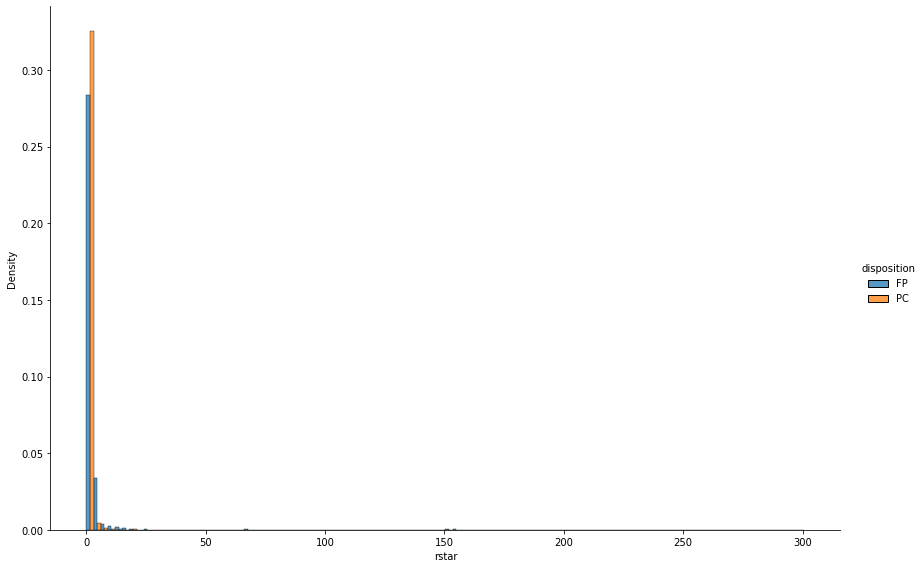

In [24]:
print('Histogram of Star Radius')
sns.displot(tce_total, x="rstar",hue='disposition',stat='density',multiple='dodge',
            common_norm=False,bins=100,height=8,aspect=1.5);

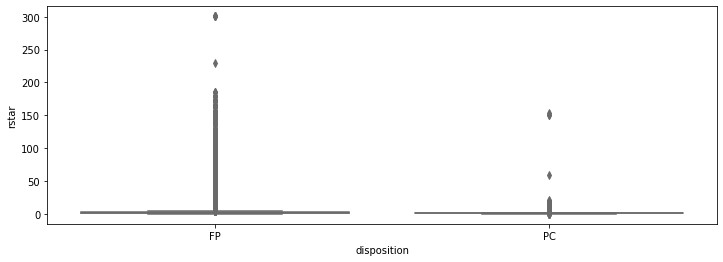

In [25]:
fig,ax=plt.subplots(figsize=(12,4))
sns.boxplot(x="disposition", y="rstar", 
                 data=tce_total, palette="Set3",ax=ax)

Distribution of Star Radius by Disposition
____________________________________________________________________________________________________


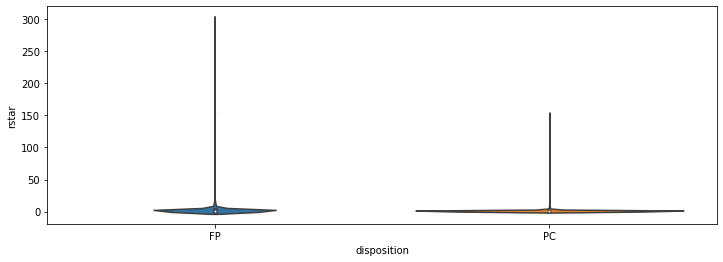

In [26]:
fig,ax=plt.subplots(figsize=(12,4))
print('Distribution of Star Radius by Disposition')
print('_'*100)
sns.violinplot(x="disposition", y="rstar", data=tce_total,ax=ax);


In [27]:
print('Distribution of Star Radius')
print('_'*27)
tce_analyze.rstar.describe()

Distribution of Star Radius
___________________________


count   32534.00000
mean        3.22926
std        13.74747
min         0.10900
25%         0.85625
50%         1.23200
75%         2.16000
max       300.74900
Name: rstar, dtype: float64

## Using TCE and KOI files from MAST data archive

In [28]:
!ls -l

total 109312
-rw-rw-r-- 1 ubuntu ubuntu     4036 Oct 17 11:41 002990873
-rw-rw-r-- 1 ubuntu ubuntu     4036 Oct 19 22:43 002990873.1
-rw-rw-r-- 1 ubuntu ubuntu      329 Oct 14 22:13 README.md
drwxrwxr-x 2 ubuntu ubuntu     4096 Oct 20 01:11 __pycache__
-rw-rw-r-- 1 ubuntu ubuntu  3650473 Oct 19 23:16 cumulative_2020.10.19_16.12.52.csv
-rw-rw-r-- 1 ubuntu ubuntu      232 Oct 20 01:06 definitions.py
-rw-rw-r-- 1 ubuntu ubuntu   217785 Oct 20 01:12 eda.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 31546781 Oct 20 17:06 full_tce_list.csv
-rw-rw-r-- 1 ubuntu ubuntu 11584055 Oct 20 01:01 full_tce_list_with_disposition_34032.csv
-rw-rw-r-- 1 ubuntu ubuntu      937 Oct 17 14:16 get_light_curves.py
drwxrwxr-x 3 ubuntu ubuntu     4096 Oct 14 20:52 helpers
-rw-r--r-- 1 ubuntu ubuntu 46576123 Oct 13 23:58 kplr_dr25_obs_robovetter_input.txt
-rw-rw-r-- 1 ubuntu ubuntu  3248616 Oct 13 23:36 kplr_dr25_obs_robovetter_output.txt
-rw-rw-r-- 1 ubuntu ubuntu    11626 Oct  8 21:13 main.py
-rw-rw-r-- 1 ubuntu ubuntu     

In [29]:
tce2=pd.read_csv('q1_q17_dr25_tce.csv')
koi=pd.read_csv('q1_q17_dr25_koi.csv')

In [30]:
tce2.columns

Index(['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period',
       'tce_period_err', 'tce_time0bk', 'tce_time0bk_err', 'tce_impact',
       'tce_impact_err', 'tce_duration', 'tce_duration_err', 'tce_depth',
       'tce_depth_err', 'tce_model_snr', 'tce_prad', 'tce_prad_err', 'tce_eqt',
       'tce_eqt_err', 'tce_insol', 'tce_insol_err', 'tce_steff',
       'tce_steff_err', 'tce_slogg', 'tce_slogg_err', 'tce_sradius',
       'tce_sradius_err'],
      dtype='object')

In [31]:
koi.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra_str', 'dec_str', 'koi_kepmag',
       'koi_kepmag_err'],
      dtype='object')

In [32]:
koi.koi_disposition.value_counts()

FALSE POSITIVE    3976
CONFIRMED         2344
CANDIDATE         1734
Name: koi_disposition, dtype: int64

In [33]:
koi.head(5)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.00000,0,1,0,0,...,4.54400,0.04400,-0.17600,0.86800,0.23300,-0.07800,19h48m01.16s,+48d08m02.9s,15.43600,nan
1,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.00000,0,1,0,0,...,4.56400,0.05300,-0.16800,0.79100,0.20100,-0.06700,19h02m08.31s,+48d17m06.8s,15.59700,nan
2,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.00000,0,0,0,0,...,4.43800,0.07000,-0.21000,1.04600,0.33400,-0.13300,19h15m01.17s,+48d13m34.3s,15.50900,nan
3,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.00000,0,0,0,0,...,4.48600,0.05400,-0.22900,0.97200,0.31500,-0.10500,19h45m08.67s,+48d13m28.8s,15.71400,nan
4,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.00000,0,0,0,0,...,4.48600,0.05400,-0.22900,0.97200,0.31500,-0.10500,19h45m08.67s,+48d13m28.8s,15.71400,nan


In [34]:
koi.shape

(8054, 50)

In [35]:
tce2.shape

(34032, 26)

In [36]:
tce2.head(5)

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
0,2304168,2,0,431.71900,0.01180,219.29800,0.01838,0.93080,0.03871,13.22000,...,494.00000,104.00000,14.09000,11.85000,7221.00000,327.00000,3.67000,0.49000,3.33200,1.71800
1,2304235,1,0,0.57061,0.00001,132.04900,0.00070,0.90000,0.26870,1.16000,...,0.00000,-1.00000,0.00000,-1.00000,4896.00000,172.00000,2.12000,0.56000,26.32000,17.39000
2,2304566,1,0,0.68948,0.00005,131.83300,0.01984,0.30850,45.49000,5.23600,...,0.00000,-1.00000,0.00000,-1.00000,7059.00000,269.00000,3.29000,0.43000,5.89400,2.82500
3,2304320,1,0,16.54080,0.00004,133.95200,0.00219,0.88480,0.22350,2.71500,...,570.00000,16.60000,24.93000,2.91000,5064.00000,101.00000,4.57000,0.05000,0.76900,0.04900
4,2303365,2,0,0.52070,0.00001,132.00300,0.00092,0.90080,0.41550,1.03500,...,0.00000,-1.00000,0.00000,-1.00000,7517.00000,339.00000,3.64000,0.46000,3.60300,1.76200


In [37]:
tce2.head(5)

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
0,2304168,2,0,431.71900,0.01180,219.29800,0.01838,0.93080,0.03871,13.22000,...,494.00000,104.00000,14.09000,11.85000,7221.00000,327.00000,3.67000,0.49000,3.33200,1.71800
1,2304235,1,0,0.57061,0.00001,132.04900,0.00070,0.90000,0.26870,1.16000,...,0.00000,-1.00000,0.00000,-1.00000,4896.00000,172.00000,2.12000,0.56000,26.32000,17.39000
2,2304566,1,0,0.68948,0.00005,131.83300,0.01984,0.30850,45.49000,5.23600,...,0.00000,-1.00000,0.00000,-1.00000,7059.00000,269.00000,3.29000,0.43000,5.89400,2.82500
3,2304320,1,0,16.54080,0.00004,133.95200,0.00219,0.88480,0.22350,2.71500,...,570.00000,16.60000,24.93000,2.91000,5064.00000,101.00000,4.57000,0.05000,0.76900,0.04900
4,2303365,2,0,0.52070,0.00001,132.00300,0.00092,0.90080,0.41550,1.03500,...,0.00000,-1.00000,0.00000,-1.00000,7517.00000,339.00000,3.64000,0.46000,3.60300,1.76200


In [38]:
tce2.kepid.value_counts()

2556639     10
8018769     10
3458687     10
9156461     10
6715221     10
            ..
2990873      1
10339093     1
5962514      1
9306893      1
7935997      1
Name: kepid, Length: 17230, dtype: int64

In [39]:
koi[koi.kepid==2990873]

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
2256,2990873,K02335.01,Kepler-1194 b,CONFIRMED,CANDIDATE,0.99300,0,0,0,0,...,4.46000,0.06800,-0.10200,0.92500,0.12000,-0.07000,19h26m47.89s,+38d08m43.0s,14.12900,nan


In [40]:
tce2[tce2.kepid==2990873]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
1102,2990873,1,0,16.22380,0.00006,136.02400,0.00322,0.85180,0.62570,2.66200,...,676.00000,33.10000,49.47000,9.68000,5547.00000,110.00000,4.46000,0.10000,0.92500,0.12000


In [41]:
tce_total[tce_total.KIC==2990873]

,TCE_ID,rv_score,disposition,not_transit,stellar_eclipse,centroid_offset,ephemeris,other,Data_Set,KIC,...,alb_alt,alb_alt_perr,alb_alt_merr,mod_depth_pri_alt,mod_depth_sec_alt,mod_ph_sec_alt,mod_ph_ter_alt,sdepthsig_dv,sdepthsig_alt,radius_ratio
1223,002990873-01,0.99300,PC,0,0,0,0,NaN,OBS,2990873,...,104.33700,230.23300,59.06100,0.00025,0.00004,0.94649,0.15859,0.14056,0.15925,0.54094


In [42]:
tce_total[tce_total.KIC==5793275]

,TCE_ID,rv_score,disposition,not_transit,stellar_eclipse,centroid_offset,ephemeris,other,Data_Set,KIC,...,alb_alt,alb_alt_perr,alb_alt_merr,mod_depth_pri_alt,mod_depth_sec_alt,mod_ph_sec_alt,mod_ph_ter_alt,sdepthsig_dv,sdepthsig_alt,radius_ratio


wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -erobots=off -R 'index*' -A _llc.fits -P E:\new_fits\0057/005793275 http://archive.stsci.edu/pub/kepler/lightcurves/0057/005793275/
wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -erobots=off -R 'index*' -A _llc.fits -P E:\new_fits\0097/009715488 http://archive.stsci.edu/pub/kepler/lightcurves/0097/009715488/
wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -erobots=off -R 'index*' -A _llc.fits -P E:\new_fits\0054/005471217 http://archive.stsci.edu/pub/kepler/lightcurves/0054/005471217/
wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -erobots=off -R 'index*' -A _llc.fits -P E:\new_fits\0025/002575161 http://archive.stsci.edu/pub/kepler/lightcurves/0025/002575161/

-P save to specific location
-i to specify a txt file to read http addresses from
-q quietly
-nH disable generation of host-prefixe directories
--cut-dirs somehow deletes host directories
-c continue downloading if already started
-N turn on timestamping
-np do not ascend to parent directory
-R rejects certain files (in this case index)
-A accept list (in this case '_llc.fits')

wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -erobots=off -R 'index*' -A _llc.fits -P \light_curves http://archive.stsci.edu/pub/kepler/lightcurves/0025/002575161/


In [43]:
!wget http://archive.stsci.edu/pub/kepler/lightcurves/0029/002990873

--2020-10-19 22:43:16--  http://archive.stsci.edu/pub/kepler/lightcurves/0029/002990873
Resolving archive.stsci.edu (archive.stsci.edu)... 130.167.252.39
Connecting to archive.stsci.edu (archive.stsci.edu)|130.167.252.39|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://archive.stsci.edu/pub/kepler/lightcurves/0029/002990873/ [following]
--2020-10-19 22:43:16--  http://archive.stsci.edu/pub/kepler/lightcurves/0029/002990873/
Reusing existing connection to archive.stsci.edu:80.
HTTP request sent, awaiting response... 200 OK
Length: 4036 (3.9K) [text/html]
Saving to: ‘002990873.1’

002990873.1         100%[===================>]   3.94K  --.-KB/s    in 0s      

2020-10-19 22:43:16 (293 MB/s) - ‘002990873.1’ saved [4036/4036]



In [44]:
!ls -l

total 199712
-rw-rw-r-- 1 ubuntu ubuntu      4036 Oct 17 11:41 002990873
-rw-rw-r-- 1 ubuntu ubuntu      4036 Oct 19 22:43 002990873.1
-rw-rw-r-- 1 ubuntu ubuntu       329 Oct 14 22:13 README.md
drwxrwxr-x 2 ubuntu ubuntu      4096 Oct 17 14:16 __pycache__
-rw-rw-r-- 1 ubuntu ubuntu       176 Oct 17 14:15 definitions.py
-rw-rw-r-- 1 ubuntu ubuntu    166332 Oct 17 14:13 eda.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  31546781 Oct 19 22:43 full_tce_list.csv
-rw-rw-r-- 1 ubuntu ubuntu       937 Oct 17 14:16 get_light_curves.py
drwxrwxr-x 3 ubuntu ubuntu      4096 Oct 14 20:52 helpers
-rw-r--r-- 1 ubuntu ubuntu  46576123 Oct 13 23:58 kplr_dr25_obs_robovetter_input.txt
-rw-rw-r-- 1 ubuntu ubuntu   3248616 Oct 13 23:36 kplr_dr25_obs_robovetter_output.txt
-rw-rw-r-- 1 ubuntu ubuntu     11626 Oct  8 21:13 main.py
-rw-rw-r-- 1 ubuntu ubuntu      9091 Oct 17 14:15 make_dataset.py
-rw------- 1 ubuntu ubuntu 114573757 Oct 19 22:30 nohup.out
drwxrwxr-x 3 ubuntu ubuntu      4096 Oct 16 13:08 processed_data
-r

In [43]:
def get_size(start_path = 'raw_data/light_curves'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size

print(get_size(), 'bytes')

3321959044 bytes


In [44]:
tce2[tce2.kepid==11442793]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
30914,11442793,1,0,331.60300,0.00029,140.48000,0.00074,0.23100,0.14030,14.49000,...,294.00000,17.10000,1.76000,0.41000,5970.00000,131.00000,4.32000,0.12000,1.20000,0.19500
30973,11442793,2,0,210.59300,0.00036,147.09900,0.00140,0.07999,1.22500,12.06000,...,342.00000,19.80000,3.22000,0.75000,5970.00000,131.00000,4.32000,0.12000,1.20000,0.19500
30974,11442793,3,0,59.73690,0.00036,158.96200,0.00387,0.85070,0.07483,8.53700,...,520.00000,30.20000,17.30000,4.02000,5970.00000,131.00000,4.32000,0.12000,1.20000,0.19500
30975,11442793,4,0,91.93950,0.00070,134.30700,0.00569,0.90670,0.03286,10.03000,...,450.00000,26.20000,9.73000,2.26000,5970.00000,131.00000,4.32000,0.12000,1.20000,0.19500
31029,11442793,5,0,124.91500,0.00157,254.70400,0.00921,0.89450,0.05358,11.74000,...,407.00000,23.60000,6.47000,1.50000,5970.00000,131.00000,4.32000,0.12000,1.20000,0.19500
31030,11442793,6,0,7.00821,0.00005,137.67500,0.00483,0.96140,0.02952,4.41700,...,1060.00000,61.70000,301.14000,69.94000,5970.00000,131.00000,4.32000,0.12000,1.20000,0.19500
31031,11442793,7,0,8.71980,0.00007,139.52100,0.00623,0.97840,0.00776,4.80900,...,988.00000,57.30000,225.03000,52.26000,5970.00000,131.00000,4.32000,0.12000,1.20000,0.19500


In [45]:
tce2.columns

Index(['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period',
       'tce_period_err', 'tce_time0bk', 'tce_time0bk_err', 'tce_impact',
       'tce_impact_err', 'tce_duration', 'tce_duration_err', 'tce_depth',
       'tce_depth_err', 'tce_model_snr', 'tce_prad', 'tce_prad_err', 'tce_eqt',
       'tce_eqt_err', 'tce_insol', 'tce_insol_err', 'tce_steff',
       'tce_steff_err', 'tce_slogg', 'tce_slogg_err', 'tce_sradius',
       'tce_sradius_err'],
      dtype='object')

In [46]:
tce.columns

Index(['TCE_ID', 'rv_score', 'disposition', 'not_transit', 'stellar_eclipse',
       'centroid_offset', 'ephemeris', 'other'],
      dtype='object')

In [47]:
koi.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra_str', 'dec_str', 'koi_kepmag',
       'koi_kepmag_err'],
      dtype='object')

In [48]:
koi.koi_disposition.value_counts()

FALSE POSITIVE    3976
CONFIRMED         2344
CANDIDATE         1734
Name: koi_disposition, dtype: int64

In [49]:
koi.koi_pdisposition.value_counts()

CANDIDATE         4034
FALSE POSITIVE    4020
Name: koi_pdisposition, dtype: int64

In [50]:
koi2=pd.read_csv('cumulative_2020.10.19_16.12.52.csv',skiprows=53)

In [51]:
koi2.head(5)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.00000,0,0,0,0,...,-81.00000,4.46700,0.06400,-0.09600,0.92700,0.10500,-0.06100,291.93423,48.14165,15.34700
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.96900,0,0,0,0,...,-81.00000,4.46700,0.06400,-0.09600,0.92700,0.10500,-0.06100,291.93423,48.14165,15.34700
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.00000,0,0,0,0,...,-176.00000,4.54400,0.04400,-0.17600,0.86800,0.23300,-0.07800,297.00482,48.13413,15.43600
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.00000,0,1,0,0,...,-174.00000,4.56400,0.05300,-0.16800,0.79100,0.20100,-0.06700,285.53461,48.28521,15.59700
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.00000,0,0,0,0,...,-211.00000,4.43800,0.07000,-0.21000,1.04600,0.33400,-0.13300,288.75488,48.22620,15.50900


In [52]:
koi2.koi_disposition.value_counts()

FALSE POSITIVE    4840
CANDIDATE         2368
CONFIRMED         2356
Name: koi_disposition, dtype: int64

In [53]:
koi2.koi_tce_plnt_num

0      1.00000
1      2.00000
2      1.00000
3      1.00000
4      1.00000
         ...  
9559   1.00000
9560   1.00000
9561   1.00000
9562   1.00000
9563   1.00000
Name: koi_tce_plnt_num, Length: 9564, dtype: float64

In [54]:
tce2.head(5)

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
0,2304168,2,0,431.71900,0.01180,219.29800,0.01838,0.93080,0.03871,13.22000,...,494.00000,104.00000,14.09000,11.85000,7221.00000,327.00000,3.67000,0.49000,3.33200,1.71800
1,2304235,1,0,0.57061,0.00001,132.04900,0.00070,0.90000,0.26870,1.16000,...,0.00000,-1.00000,0.00000,-1.00000,4896.00000,172.00000,2.12000,0.56000,26.32000,17.39000
2,2304566,1,0,0.68948,0.00005,131.83300,0.01984,0.30850,45.49000,5.23600,...,0.00000,-1.00000,0.00000,-1.00000,7059.00000,269.00000,3.29000,0.43000,5.89400,2.82500
3,2304320,1,0,16.54080,0.00004,133.95200,0.00219,0.88480,0.22350,2.71500,...,570.00000,16.60000,24.93000,2.91000,5064.00000,101.00000,4.57000,0.05000,0.76900,0.04900
4,2303365,2,0,0.52070,0.00001,132.00300,0.00092,0.90080,0.41550,1.03500,...,0.00000,-1.00000,0.00000,-1.00000,7517.00000,339.00000,3.64000,0.46000,3.60300,1.76200


In [55]:
tce2.shape

(34032, 26)

In [56]:
koi2.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [57]:
#this is to deal with error caught below where the koi_tce_plnt_num has DUPLICATES but the suffix in
#kepoi_name is right
test3=koi2.kepoi_name.str.split('.')
new_plnt_num=[int(a[1]) for a in test3]
koi2['koi_new_tce_plnt_num']=new_plnt_num

In [58]:
new=tce2.merge(koi2,how='left',left_on=['kepid','tce_plnt_num'],right_on=['kepid','koi_new_tce_plnt_num'])

In [59]:
print(tce2.shape)
print(new.shape)

(34032, 26)
(34032, 75)


In [60]:
new.columns

Index(['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period',
       'tce_period_err', 'tce_time0bk', 'tce_time0bk_err', 'tce_impact',
       'tce_impact_err', 'tce_duration', 'tce_duration_err', 'tce_depth',
       'tce_depth_err', 'tce_model_snr', 'tce_prad', 'tce_prad_err', 'tce_eqt',
       'tce_eqt_err', 'tce_insol', 'tce_insol_err', 'tce_steff',
       'tce_steff_err', 'tce_slogg', 'tce_slogg_err', 'tce_sradius',
       'tce_sradius_err', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err

In [61]:
new.koi_disposition=new.koi_disposition.fillna('FALSE POSITIVE')
new.koi_pdisposition=new.koi_pdisposition.fillna('FALSE POSITIVE')
print(new.koi_disposition.value_counts(dropna=False))
print(new.koi_pdisposition.value_counts(dropna=False))

FALSE POSITIVE    29835
CONFIRMED          2345
CANDIDATE          1852
Name: koi_disposition, dtype: int64
FALSE POSITIVE    29841
CANDIDATE          4191
Name: koi_pdisposition, dtype: int64


In [62]:
new.groupby('koi_pdisposition').koi_score.mean()

koi_pdisposition
CANDIDATE        0.90705
FALSE POSITIVE   0.03889
Name: koi_score, dtype: float64

In [78]:
new.to_csv('full_tce_list_with_disposition_34032.csv',index=False)

In [79]:
new.shape

(34032, 75)

In [80]:
complete_tce=pd.read_csv('full_tce_list_with_disposition_34032.csv')

In [81]:
complete_tce.shape

(34032, 75)

In [83]:
complete_tce.head()

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_new_tce_plnt_num
0,2304168,2,0,431.71900,0.01180,219.29800,0.01838,0.93080,0.03871,13.22000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2304235,1,0,0.57061,0.00001,132.04900,0.00070,0.90000,0.26870,1.16000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2304566,1,0,0.68948,0.00005,131.83300,0.01984,0.30850,45.49000,5.23600,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2304320,1,0,16.54080,0.00004,133.95200,0.00219,0.88480,0.22350,2.71500,...,4.57200,0.02800,-0.04800,0.76900,0.04900,-0.03800,291.74164,37.68894,13.75500,1.00000
4,2303365,2,0,0.52070,0.00001,132.00300,0.00092,0.90080,0.41550,1.03500,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [84]:
#adding in autovetter scores from DR24 - only covers ~20k TCE so not

In [85]:
dr24_tce=pd.read_csv('q1_q17_dr24_tce_2020.10.20_10.28.20.csv',skiprows=41)
dr24_tce.shape

(20367, 37)

In [86]:
dr24_tce=dr24_tce[['kepid','tce_plnt_num','av_vf_pc', 'av_vf_pc_err', 'av_vf_afp',
       'av_vf_afp_err', 'av_vf_ntp', 'av_vf_ntp_err', 'av_pp_pc', 'av_pp_afp',
       'av_pp_ntp', 'av_training_set', 'av_pred_class']]

In [97]:
complete_tce_with_av=complete_tce.merge(dr24_tce,how='left',left_on=['kepid','tce_plnt_num'],right_on=['kepid','tce_plnt_num'])

In [98]:
print(complete_tce_with_av.shape)
print('Records with no AV:',complete_tce_with_av.av_pp_pc.isna().sum())
print('Records with AV:',complete_tce_with_av.shape[0]-complete_tce_with_av.av_pp_pc.isna().sum())

(34032, 86)
Records with no AV: 18226
Records with AV: 15806


In [99]:
complete_tce_with_av.to_csv('full_tce_list_with_disposition_and_av_34032.csv',index=False)

In [100]:
complete_tce_with_av=pd.read_csv('full_tce_list_with_disposition_and_av_34032.csv')
complete_tce_with_av.head(5)

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,av_vf_pc_err,av_vf_afp,av_vf_afp_err,av_vf_ntp,av_vf_ntp_err,av_pp_pc,av_pp_afp,av_pp_ntp,av_training_set,av_pred_class
0,2304168,2,0,431.71900,0.01180,219.29800,0.01838,0.93080,0.03871,13.22000,...,0.01640,93.85400,0.09370,6.04710,0.09540,0.00000,98.16420,1.83580,AFP,AFP
1,2304235,1,0,0.57061,0.00001,132.04900,0.00070,0.90000,0.26870,1.16000,...,0.02580,92.98560,0.15620,6.62410,0.15800,0.00140,97.88720,2.11140,AFP,AFP
2,2304566,1,0,0.68948,0.00005,131.83300,0.01984,0.30850,45.49000,5.23600,...,0.03190,16.83920,0.16710,82.59500,0.16030,0.13200,4.73660,95.13140,UNK,NTP
3,2304320,1,0,16.54080,0.00004,133.95200,0.00219,0.88480,0.22350,2.71500,...,0.10310,2.10870,0.10140,0.04100,0.01000,99.36280,0.63720,0.00000,PC,PC
4,2303365,2,0,0.52070,0.00001,132.00300,0.00092,0.90080,0.41550,1.03500,...,0.00000,99.90290,0.01280,0.09710,0.01280,0.00000,99.92450,0.07550,AFP,AFP


In [103]:
koi.koi_score.describe()

count   8054.00000
mean       0.48083
std        0.47693
min        0.00000
25%        0.00000
50%        0.33400
75%        0.99800
max        1.00000
Name: koi_score, dtype: float64

In [105]:
koi[koi.kepid==2852941]

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
5272,2852941,K04298.01,NaN,CANDIDATE,CANDIDATE,0.85400,0,0,0,0,...,4.13700,0.17000,-0.18700,1.68400,0.50100,-0.41000,19h26m10.42s,+38d02m55.5s,13.45800,nan


In [106]:
koi.shape

(8054, 50)

In [110]:
complete_tce_with_av[complete_tce_with_av.kepid==2852941]['koi_score']

1150   0.85400
1151       nan
Name: koi_score, dtype: float64

In [108]:
complete_tce_with_av.loc[1150]

kepid              2852941
tce_plnt_num             1
tce_rogue_flag           0
tce_period         2.89493
tce_period_err     0.00002
                    ...   
av_pp_pc          32.82430
av_pp_afp         30.66310
av_pp_ntp         36.51270
av_training_set        UNK
av_pred_class          NTP
Name: 1150, Length: 86, dtype: object

In [111]:
complete_tce_with_av.columns

Index(['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period',
       'tce_period_err', 'tce_time0bk', 'tce_time0bk_err', 'tce_impact',
       'tce_impact_err', 'tce_duration', 'tce_duration_err', 'tce_depth',
       'tce_depth_err', 'tce_model_snr', 'tce_prad', 'tce_prad_err', 'tce_eqt',
       'tce_eqt_err', 'tce_insol', 'tce_insol_err', 'tce_steff',
       'tce_steff_err', 'tce_slogg', 'tce_slogg_err', 'tce_sradius',
       'tce_sradius_err', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err

In [113]:
complete_tce_with_av[complete_tce_with_av.kepid==3002379]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,av_vf_pc_err,av_vf_afp,av_vf_afp_err,av_vf_ntp,av_vf_ntp_err,av_pp_pc,av_pp_afp,av_pp_ntp,av_training_set,av_pred_class
935,3002379,1,0,1.73892,0.01964,131.59800,4.08068,0.72140,21.83000,10.73000,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
936,3002379,2,0,210.25200,5524.22000,198.09100,6074.34000,0.69650,31290.00000,23.58000,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
937,3002379,3,0,75.90980,0.00141,153.33100,0.01356,1.00000,0.06420,8.27600,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
994,3002379,4,0,300.74900,0.00835,174.48600,0.02388,0.98560,0.10270,8.40000,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
995,3002379,5,1,77.74360,0.00169,161.99300,0.00711,0.68650,3.05400,4.34100,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
996,3002379,6,0,28.92500,0.00027,158.76900,0.00684,0.66710,3.62200,4.34700,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
997,3002379,7,0,60.22630,0.00079,144.32100,0.01199,0.86300,0.06668,12.77000,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
1052,3002379,8,0,75.03460,0.00156,188.77300,0.02168,0.71610,0.87410,9.75500,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN


In [114]:
complete_tce_with_av.loc[990:1000]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,av_vf_pc_err,av_vf_afp,av_vf_afp_err,av_vf_ntp,av_vf_ntp_err,av_pp_pc,av_pp_afp,av_pp_ntp,av_training_set,av_pred_class
990,2970836,1,0,1.65949,0.00003,132.44000,0.00845,0.05207,67.08000,16.33000,...,0.01160,96.66780,0.10510,3.27360,0.10380,0.00000,99.17650,0.82350,AFP,AFP
991,2988783,4,0,19.57170,0.00035,135.24400,0.01493,0.99950,0.12680,5.25200,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
992,2988783,5,0,70.90360,-1.00000,191.71200,-1.00000,0.10000,-1.00000,6.00000,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
993,2988964,1,0,2.99631,0.00005,134.36000,0.00900,0.83480,0.69410,8.89500,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
994,3002379,4,0,300.74900,0.00835,174.48600,0.02388,0.98560,0.10270,8.40000,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
995,3002379,5,1,77.74360,0.00169,161.99300,0.00711,0.68650,3.05400,4.34100,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
996,3002379,6,0,28.92500,0.00027,158.76900,0.00684,0.66710,3.62200,4.34700,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
997,3002379,7,0,60.22630,0.00079,144.32100,0.01199,0.86300,0.06668,12.77000,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
998,3103752,2,0,415.59100,0.01259,451.43000,0.01575,0.85260,0.16540,6.23900,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
999,3103752,3,0,411.50600,0.00604,195.49900,0.01178,0.56900,5.62300,4.11600,...,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN


In [115]:
test=1151
print('TCE2: ',tce2.kepid[test],tce2.tce_plnt_num[test])
print('NEW: ',new.kepid[test],new.tce_plnt_num[test],new.koi_tce_plnt_num[test])

TCE2:  2852941 2
NEW:  2852941 1 1.0


In [116]:
new.loc[1150:1152]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
1150,2852941,1,0,2.89493,0.00002,132.62700,0.00351,0.88180,0.51410,3.28800,...,-428.00000,4.13700,0.17000,-0.18700,1.68400,0.50100,-0.41000,291.54343,38.04876,13.45800
1151,2852941,1,0,2.89493,0.00002,132.62700,0.00351,0.88180,0.51410,3.28800,...,nan,nan,nan,nan,nan,nan,nan,291.54343,38.04876,13.45800
1152,2852941,2,0,422.33200,0.01346,194.02900,0.02287,0.73360,1.18600,15.14000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [119]:
tce2[tce2.kepid==2852941]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
1150,2852941,1,0,2.89493,0.00002,132.62700,0.00351,0.88180,0.51410,3.28800,...,1920.00000,204.00000,3212.10000,1363.13000,7087.00000,428.00000,4.14000,0.19000,1.68400,0.50100
1151,2852941,2,0,422.33200,0.01346,194.02900,0.02287,0.73360,1.18600,15.14000,...,365.00000,38.70000,4.18000,1.77000,7087.00000,428.00000,4.14000,0.19000,1.68400,0.50100


In [122]:
temp=koi2[koi2.kepid==2852941]

In [128]:
koi2.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [129]:
temp[['kepid','koi_tce_plnt_num','koi_period']]

,kepid,koi_tce_plnt_num,koi_period
3959,2852941,1.00000,2.89495
9042,2852941,1.00000,11.57958


In [93]:
new.loc[8000]

kepid              6039270
tce_plnt_num             2
tce_rogue_flag           0
tce_period       358.63600
tce_period_err     0.00853
                    ...   
koi_srad_err1          NaN
koi_srad_err2          NaN
ra                     NaN
dec                    NaN
koi_kepmag             NaN
Name: 9000, Length: 74, dtype: object

In [92]:
new.tce_plnt_num.value_counts(dropna=False)

1     17242
2      7122
3      3561
4      2186
5      1477
6      1007
7       653
8       421
9       243
10      139
Name: tce_plnt_num, dtype: int64

#### Error in MAST KOI data?
Maybe found error in KOI data?  Note same koi_tce_plnt_num when kepoi_name suggests different planet numbers

In [135]:
test=koi2[koi2.kepid==2852941]
test[['kepid','kepoi_name','koi_tce_plnt_num','koi_period']]

,kepid,kepoi_name,koi_tce_plnt_num,koi_period
3959,2852941,K04298.01,1.00000,2.89495
9042,2852941,K04298.02,1.00000,11.57958


In [138]:
#find same kepid and same planet number
test=koi2.groupby('kepid').koi_tce_plnt_num.value_counts().sort_values(ascending=False)

In [158]:
test=test[test>1]
test=pd.DataFrame(test)

In [160]:
test.columns=['number']
test.reset_index()

,kepid,koi_tce_plnt_num,number
0,10662202,3.00000,2
1,10743597,1.00000,2
2,3937814,2.00000,2
3,7539174,1.00000,2
4,10972902,1.00000,2
5,7935997,1.00000,2
6,8330548,1.00000,2
7,11453930,1.00000,2
8,6592335,1.00000,2
9,12116489,2.00000,2


In [162]:
test2=koi2[koi2.kepid==10793172]
test2[['kepid','kepoi_name','koi_tce_plnt_num','koi_period']]

,kepid,kepoi_name,koi_tce_plnt_num,koi_period
2465,10793172,K02871.01,1.00000,12.09991
2466,10793172,K02871.02,2.00000,5.36375
3227,10793172,K02871.04,3.00000,7.97882
7587,10793172,K02871.03,3.00000,18.08114
